In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/Soccer/results.csv' ,index_col=0)
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
print(len(df))

40945


In [0]:
df['home_team_win'] = np.nan

In [0]:
df['home_team_win'][df['home_score'] > df['away_score']] = "2"
df['home_team_win'][df['home_score'] < df['away_score']] = "0"
df['home_team_win'][df['home_score'] == df['away_score']] = "1"

# 0 represents home team lost, 1 represents home team tied, 2 represents home team won

df['home_team_win'] = pd.to_numeric(df['home_team_win'])
df['home_score'] = pd.to_numeric(df['home_score'])
df['away_score'] = pd.to_numeric(df['away_score'])

# We are making it numerical instead of categorical for now for a cleaner
# dataset for when we make our dummy varaibles

In [0]:
for i in range(0,2):
  df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
for i in range(4,6):
  df.iloc[:,i] = pd.Categorical(df.iloc[:,i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40945 entries, 1872-11-30 to 2019-09-30
Data columns (total 9 columns):
home_team        40945 non-null category
away_team        40945 non-null category
home_score       40945 non-null int64
away_score       40945 non-null int64
tournament       40945 non-null category
city             40945 non-null category
country          40945 non-null object
neutral          40945 non-null bool
home_team_win    40945 non-null int64
dtypes: bool(1), category(4), int64(3), object(1)
memory usage: 2.0+ MB


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df.neutral = le.fit_transform(df.neutral)

df.neutral = pd.Categorical(df.neutral)

# 0 = False

In [10]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_win
date,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,0,1
1873-03-08,England,Scotland,4,2,Friendly,London,England,0,2
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,0,2
1875-03-06,England,Scotland,2,2,Friendly,London,England,0,1
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,0,2


In [0]:
df = pd.get_dummies(df)
df.home_team_win = pd.Categorical(df.home_team_win)

In [12]:
df.head()

,home_score,away_score,home_team_win,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Arameans Suryoye,home_team_Argentina,home_team_Armenia,home_team_Artsakh,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barawa,home_team_Barbados,home_team_Basque Country,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bonaire,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,...,country_São Tomé and Príncipe,country_Tahiti,country_Tajikistan,country_Tanganyika,country_Tanzania,country_Thailand,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks and Caicos Islands,country_U.S. Virgin Islands,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Arab Republic,country_United States,country_Upper Volta,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Vietnam DR,country_Vietnam Republic,country_Wales,country_Western Samoa,country_Yemen,country_Yemen AR,country_Yemen DPR,country_Yugoslavia,country_Zambia,country_Zanzibar,country_Zaïre,country_Zimbabwe,country_Éire,neutral_0,neutral_1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1872-11-30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1873-03-08,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1874-03-07,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1875-03-06,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1876-03-04,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
import keras
from keras import layers
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


x_data = df.drop('home_team_win' , axis = 1)
y_data = df.home_team_win

X_train, x_test, y_train, y_test = train_test_split = train_test_split(x_data, y_data, test_size = 0.30 , random_state = 23)

Using TensorFlow backend.


In [0]:
#model.fit(X_train, y_train , epochs= 20, batch_size= 1000)

In [15]:
import keras
from keras import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers import Flatten
from keras import Model
from keras import regularizers
from keras import optimizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping


early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

model = Sequential()

# We are going to include a dropout layer after the input layer to avoid overfitting

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))), 
model.add(Dropout(0.20)),
model.add(Dense(3 , activation= 'softmax'))

learningrate = 0.001
epochs = 30
momentum= 0.7

sgd = optimizers.SGD(lr=learningrate , momentum= momentum)

model.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                189632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 189,827
Trainable params: 189,827
Non-trainable params: 0
_________________________________________________________________


In [16]:
m = model.fit(X_train, y_train , epochs= epochs, batch_size= 1000 , callbacks= [early_stopping_monitor])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





28661/28661 [==============================] - 6s 206us/step - loss: 1.0789 - acc: 0.4439
Epoch 2/30
28661/28661 [==============================] - 2s 57us/step - loss: 1.0149 - acc: 0.6233
Epoch 3/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.9656 - acc: 0.6508
Epoch 4/30
28661/28661 [==============================] - 2s 55us/step - loss: 0.9255 - acc: 0.6645
Epoch 5/30
28661/28661 [==============================] - 2s 54us/step - loss: 0.8913 - acc: 0.6796
Epoch 6/30
28661/28661 [==============================] - 2s 55us/step - loss: 0.8613 - acc: 0.6931
Epoch 7/30
28661/28661 [==============================] - 2s 57us/step - loss: 0.8336 - acc: 0.7100
Epoch 8/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.8052 - acc: 0.7271
Epoch 9/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.7804 - acc: 0.74

In [17]:
from keras import backend as K 

K.clear_session()

In [18]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

model1 = Sequential()

# This model is to see if we can get a better accuracy if the dropout is the input layer

model1.add(Dropout(0.20 , input_shape=(X_train.shape[1],))),
model1.add(Dense(64, activation='relu',)),
model1.add(Dense(3 , activation= 'softmax'))

learningrate = 0.001
epochs = 30
momentum = 0.7

sgd = optimizers.SGD(lr=learningrate , momentum= momentum)

model1.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 2962)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                189632    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 189,827
Trainable params: 189,827
Non-trainable params: 0
_________________________________________________________________


In [19]:
m1 = model1.fit(X_train, y_train , epochs= epochs, batch_size= 1000 , callbacks= [early_stopping_monitor])

# It seems the best model is to use a dropout layer after the input layer

Epoch 1/30
28661/28661 [==============================] - 2s 63us/step - loss: 1.0923 - acc: 0.3520
Epoch 2/30
28661/28661 [==============================] - 2s 58us/step - loss: 1.0016 - acc: 0.5846
Epoch 3/30
28661/28661 [==============================] - 2s 57us/step - loss: 0.9523 - acc: 0.6167
Epoch 4/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.9185 - acc: 0.6248
Epoch 5/30
28661/28661 [==============================] - 2s 57us/step - loss: 0.8901 - acc: 0.6361
Epoch 6/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.8643 - acc: 0.6483
Epoch 7/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.8480 - acc: 0.6520
Epoch 8/30
28661/28661 [==============================] - 2s 57us/step - loss: 0.8317 - acc: 0.6611
Epoch 9/30
28661/28661 [==============================] - 2s 57us/step - loss: 0.8146 - acc: 0.6653
Epoch 10/30
28661/28661 [==============================] - 2s 56us/step - loss: 0.8011 - acc: 0.6701

In [0]:
K.clear_session()

In [21]:
# Let's use some RNN such as LSTM and GRU and compare which model is better

model2 = Sequential()

model2.add(LSTM(64, input_shape = (X_train.shape[1],1)))
model2.add(Dropout(.2)),
model2.add(Dense(3 , activation= 'sigmoid'))


learningrate = 0.001
epochs = 3
momentum = 0.7

sgd = optimizers.SGD(lr=learningrate , momentum= momentum)

model2.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 17,091
Trainable params: 17,091
Non-trainable params: 0
_________________________________________________________________


In [22]:
m2 = model2.fit(np.array(X_train).reshape(28661,2962,1), y_train , epochs= epochs, batch_size= 500 , callbacks= [early_stopping_monitor])

Epoch 1/3
28661/28661 [==============================] - 316s 11ms/step - loss: 1.0957 - acc: 0.4618
Epoch 2/3
28661/28661 [==============================] - 320s 11ms/step - loss: 1.0910 - acc: 0.4883
Epoch 3/3
28661/28661 [==============================] - 318s 11ms/step - loss: 1.0868 - acc: 0.4883


In [0]:
K.clear_session()

In [24]:
model3 = Sequential()

model3.add(GRU(64, input_shape = (X_train.shape[1],1)))
model3.add(Dropout(.2)),
model3.add(Dense(3 , activation= 'sigmoid'))


learningrate = 0.001
epochs = 3
momentum = 0.7

sgd = optimizers.SGD(lr=learningrate , momentum= momentum)

model3.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                12672     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 12,867
Trainable params: 12,867
Non-trainable params: 0
_________________________________________________________________


In [25]:
m3 = model3.fit(np.array(X_train).reshape(28661,2962,1), y_train , epochs= epochs, batch_size= 500 , callbacks= [early_stopping_monitor])

Epoch 1/3
28661/28661 [==============================] - 260s 9ms/step - loss: 1.0928 - acc: 0.4838
Epoch 2/3
28661/28661 [==============================] - 255s 9ms/step - loss: 1.0883 - acc: 0.4881
Epoch 3/3
28661/28661 [==============================] - 258s 9ms/step - loss: 1.0841 - acc: 0.4883


In [0]:
K.clear_session()

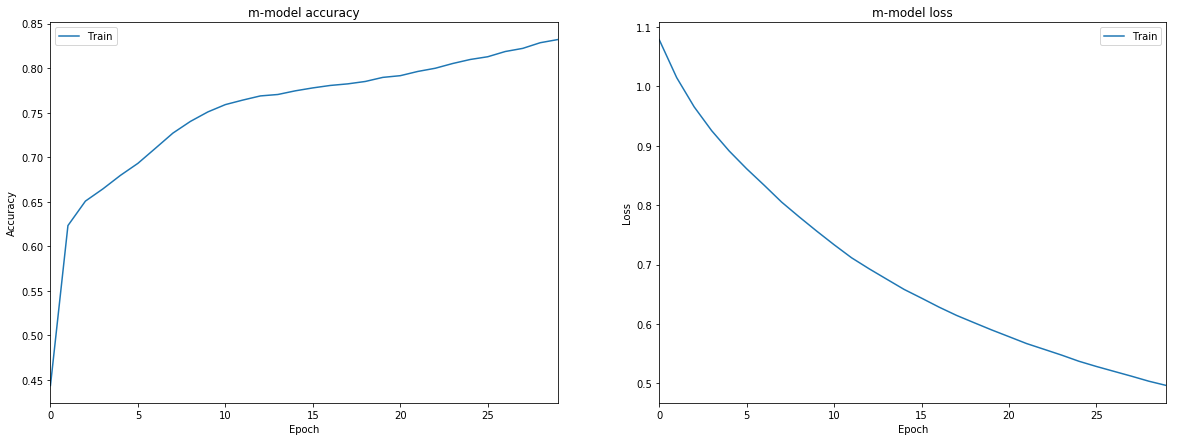

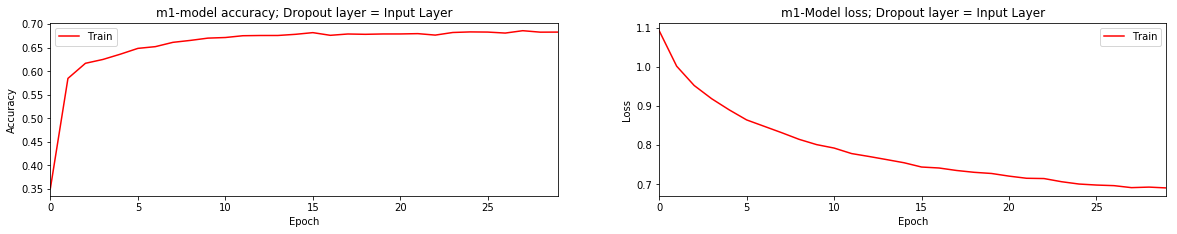

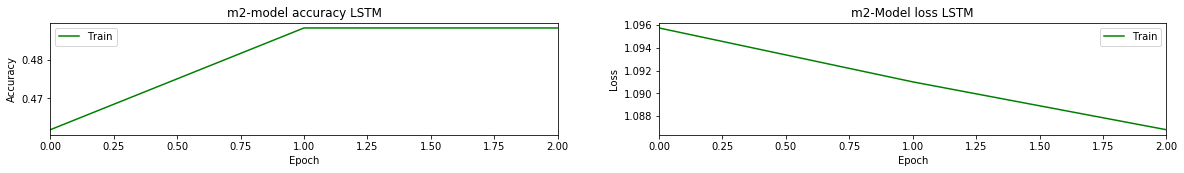

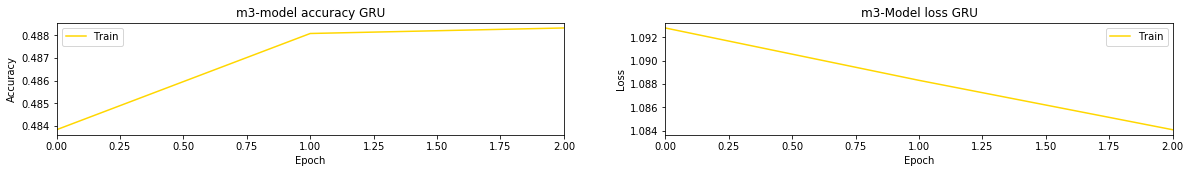

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize= (20,7))
ax = plt.subplot(121)
pd.Series(m.history['acc'] ).plot(ax = ax)
plt.title('m-model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

ax = plt.subplot(122)
pd.Series(m.history['loss']).plot(ax = ax)
plt.title('m-model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.figure(figsize= (20,7))
ax = plt.subplot(221)
pd.Series(m1.history['acc']).plot(ax = ax , c = 'red')
plt.title('m1-model accuracy; Dropout layer = Input Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='bottom left')


ax = plt.subplot(222)
pd.Series(m1.history['loss']).plot(ax = ax , c = 'red')
plt.title('m1-Model loss; Dropout layer = Input Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


plt.figure(figsize= (20,7))
ax = plt.subplot(321)
pd.Series(m2.history['acc']).plot(ax = ax , c = 'g')
plt.title('m2-model accuracy LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

ax = plt.subplot(322)
pd.Series(m2.history['loss']).plot(ax = ax , c = 'g')
plt.title('m2-Model loss LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.figure(figsize= (20,7))
ax = plt.subplot(321)
pd.Series(m3.history['acc']).plot(ax = ax , c = 'gold')
plt.title('m3-model accuracy GRU')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

ax = plt.subplot(322)
pd.Series(m3.history['loss']).plot(ax = ax , c = 'gold')
plt.title('m3-Model loss GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

We can see that the first model, the model with the dropout layer after the input layer holds the best accuracy and loss for this particular dataset

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

model4 = tf.keras.Sequential([
layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
layers.Dropout(.2),
layers.Dense(3, activation='softmax')])

model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate= 0.001 , momentum= 0.7),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                189632    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 189,827
Trainable params: 189,827
Non-trainable params: 0
_________________________________________________________________


In [30]:
m4 = model4.fit(X_train, y_train , epochs= 30, batch_size= 1000 , callbacks= [early_stopping_monitor])

Train on 28661 samples
Epoch 1/30
28661/28661 [==============================] - 2s 58us/sample - loss: 1.0370 - acc: 0.5930
Epoch 2/30
28661/28661 [==============================] - 2s 55us/sample - loss: 0.9696 - acc: 0.6454
Epoch 3/30
28661/28661 [==============================] - 2s 55us/sample - loss: 0.9190 - acc: 0.6600
Epoch 4/30
28661/28661 [==============================] - 2s 54us/sample - loss: 0.8792 - acc: 0.6747
Epoch 5/30
28661/28661 [==============================] - 2s 54us/sample - loss: 0.8465 - acc: 0.6921
Epoch 6/30
28661/28661 [==============================] - 2s 54us/sample - loss: 0.8172 - acc: 0.7084
Epoch 7/30
28661/28661 [==============================] - 2s 54us/sample - loss: 0.7923 - acc: 0.7230
Epoch 8/30
28661/28661 [==============================] - 2s 55us/sample - loss: 0.7686 - acc: 0.7374
Epoch 9/30
28661/28661 [==============================] - 2s 54us/sample - loss: 0.7475 - acc: 0.7471
Epoch 10/30
28661/28661 [==============================] - 

In [44]:
print(min(m4.history['loss']) > min(m.history['loss']))
print(max(m4.history['acc']) > max(m.history['acc']))

# From both of our top models it seems our keras model has a lower loss function
# While our tensorflow model has a higher accuracy

True
True
